In [32]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

print(cv2.__version__)

4.5.1


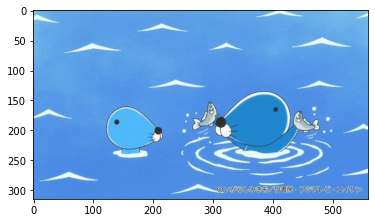

In [33]:
## 칼라 이미지 읽기, 투명한 부분은 무시 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈
plt.imshow(img)
plt.show()

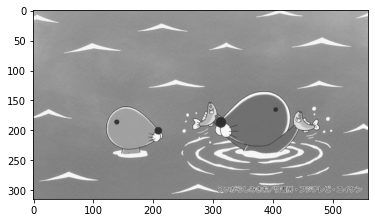

In [31]:
## 흑백 이미지 읽기 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) # BGR 형태이미지를 RGB로 바꿈
plt.imshow(img)
plt.show()

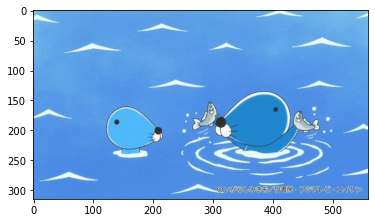

In [32]:
## 칼라 이미지 읽기, 투명한 부분도 읽음 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈
plt.imshow(img)
plt.show()

In [33]:
cv2.imwrite("new_bono.jpg", img) #이미지 저장

print(img.shape)
print(img.size)

(315, 560, 3)
529200


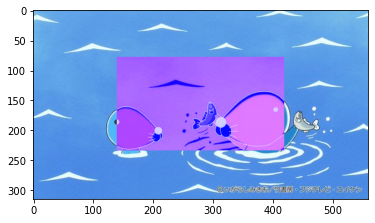

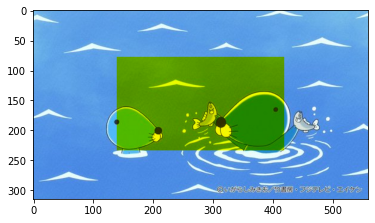

In [62]:
## 이미지 범위별로 수정 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

# 방법 1, 느림
for row in range(img.shape[0] // 4, img.shape[0] // 4 * 3):
    for col in range(img.shape[1] // 4, img.shape[1] // 4 * 3):
        img[row][col] = [255 - img[row][col][0], 255 - img[row][col][1], 255]
        
        
plt.imshow(img)
plt.show()
        
# 방법 2, numpy 사용으로 빠름
img[img.shape[0] // 4 : img.shape[0] // 4 * 3, img.shape[1] // 4 : img.shape[1] // 4 * 3] = 255 - img[img.shape[0] // 4 : img.shape[0] // 4 * 3, img.shape[1] // 4 : img.shape[1] // 4 * 3]

plt.imshow(img)
plt.show()

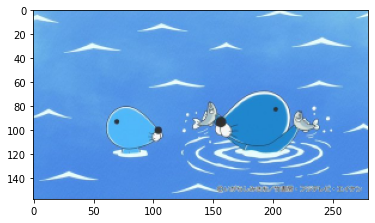

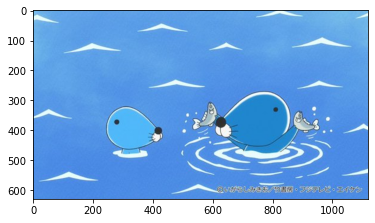

In [76]:
## 이미지 크기 수정 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

#cv2.resize(이미지, 메뉴얼세팅, 가로비율, 세로비율, 보간법)
small_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA) #이미지 축소

plt.imshow(small_img)
plt.show()

big_img = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC) #이미지 확대

plt.imshow(big_img)
plt.show()

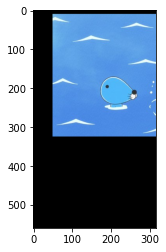

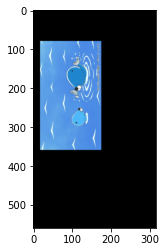

In [92]:
## 이미지 위치 변경 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

M = np.float32([[1, 0, 50], [0, 1, 10]]) #변환행렬, 가로 50 세로 10만큼 이동
trans_img = cv2.warpAffine(img, M, (img.shape[0], img.shape[1]))

plt.imshow(trans_img)
plt.show()

#cv2.getRotationMatrix2D(회전중심, 회전각도, 스케일)
R = cv2.getRotationMatrix2D((img.shape[0] / 2, img.shape[1] / 2), 90, 0.5) #가운데를 중심으로 90도 회전후 크기를 0.5로 줄임
trans_img = cv2.warpAffine(img, R, (img.shape[0], img.shape[1]))

plt.imshow(trans_img)
plt.show()

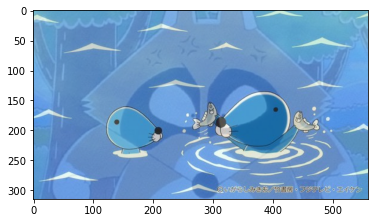

In [18]:
## 이미지 겹치기 ##

img = cv2.imread('bono.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

img2 = cv2.imread('bono2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # BGR 형태이미지를 RGB로 바꿈

#크기를 맞춰줌
img2 = cv2.resize(img2, dsize = (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)

#혼합 비율 설정
img[:, :] = img[:, :] * 0.8
img2[:, :] = img2[:, :] * 0.2

overlap = cv2.add(img, img2) #이미지 2개를 겹침

plt.imshow(overlap)
plt.show()

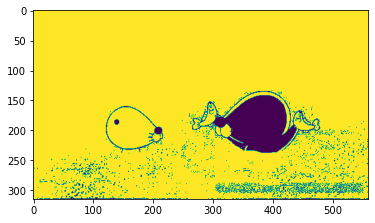

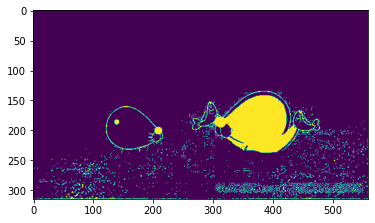

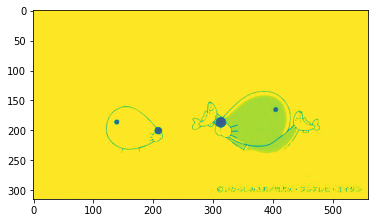

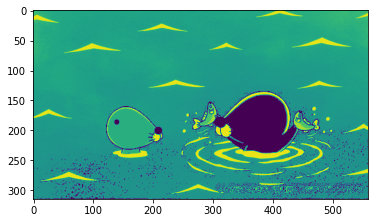

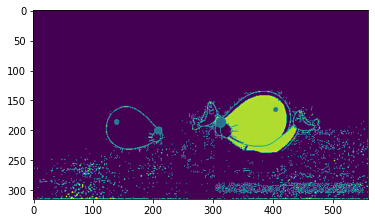

In [11]:
## 이미지 임계접 처리 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_GRAYSCALE)

_, img1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) #127을 넘는 픽셀은 255로 바꿈
_, img2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) #127을 넘지 않는 픽셀은 255로 바꿈
_, img3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) #127을 넘는 픽셀은 127로 바꿈
_, img4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) #127을 넘는 픽셀은 0으로 바꿈
_, img5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV) #127을 넘지 않는 픽셀은 0으로 바꿈

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

plt.imshow(img3)
plt.show()

plt.imshow(img4)
plt.show()

plt.imshow(img5)
plt.show()

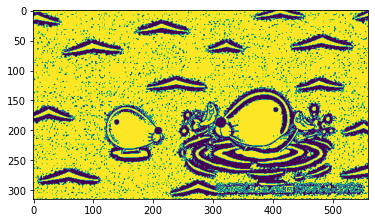

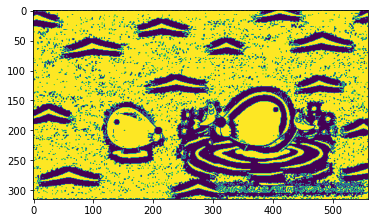

In [34]:
## 이미지 임계접 처리 ##

img = cv2.imread('bono.jpg', cv2.IMREAD_GRAYSCALE)

# 임계값을 영역별로 다르게 적용
# cv2.adaptiveThreshold(이미지, 적용 값, 임계값 결정 방식, 처리 방식, 영역의 크기, 평균이나 가중평균에서 차감할 값)
img1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3) # 가우시안 분포로 임계값 계산
img2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3) # 평균값으로 임계값 계산

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

In [ ]:
## OpenCv Tracker ##

def change_color(x):
    r = cv2.getTrackbarPos('red_track', 'track_window')
    g = cv2.getTrackbarPos('green_track', 'track_window')
    b = cv2.getTrackbarPos('blue_track', 'track_window')
    img[:] = [b, g, r]
    cv2.imshow('Image', img)


img = np.zeros((600, 600, 3), np.uint8)
cv2.namedWindow('track_window')

# cv2.createTrackbar(트랙바 이름, 윈도우 이름, 초기값, 최대값, 콜백함수)
cv2.createTrackbar('red_track', 'track_window', 0, 255, change_color)
cv2.createTrackbar('green_track', 'track_window', 0, 255, change_color)
cv2.createTrackbar('blue_track', 'track_window', 0, 255, change_color)

cv2.imshow('track_window', img)
cv2.waitKey(0)


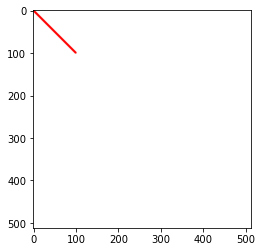

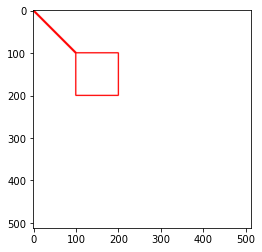

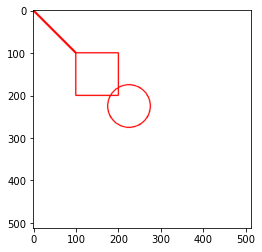

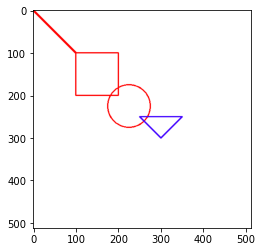

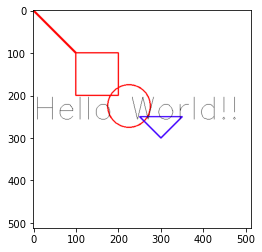

In [31]:
## 도형 그리기 ##

img = np.full((512, 512, 3), 255, np.uint8)

# cv2.line(이미지, 시작좌표, 종료좌표, 선의 색깔, 선의 두께)
img = cv2.line(img, (0, 0), (100,100), (255, 0, 0), 3) # 직선 그리기

plt.imshow(img)
plt.show()

# cv2.rectangle(이미지, 시작좌표, 종료좌표, 선의 색깔, 선의 두께), 선의 두께가 -1 이면 도형을 채움
img = cv2.rectangle(img, (100, 100), (200,200), (255, 0, 0), 2) # 사각형 그리기

plt.imshow(img)
plt.show()

# cv2.circle(이미지, 원의 중심, 반지름, 선의 색깔, 선의 두께), 선의 두께가 -1 이면 도형을 채움
img = cv2.circle(img, (225,225), 50, (255, 0, 0), 2) # 원 그리기

plt.imshow(img)
plt.show()

# cv2.polylines(이미지, 꼭지점들, 닫힌 도형 여부, 선의 색깔, 선의 두께), 선의 두께가 -1 이면 도형을 채움
img = cv2.polylines(img, [np.array([[250, 250], [350, 250], [300, 300]])], True, (64, 0, 255), 2) # 다각형 그리기

plt.imshow(img)
plt.show()

# cv2.polylines(이미지, 문자열, 위치, 폰트, 글씨 스케일, 색깔)
img = cv2.putText(img, "Hello World!!", (0, 256), cv2.FONT_ITALIC, 2.5, (0, 0, 0)) # 텍스트 그리기

plt.imshow(img)
plt.show()

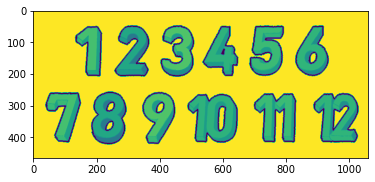

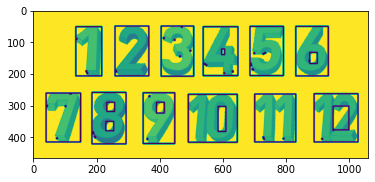

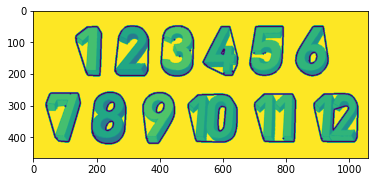

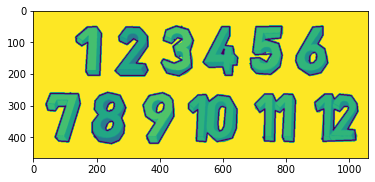

In [114]:
## 사물의 외각(컨투어) 찾기 ##

img = cv2.imread('numbers.jpg', cv2.IMREAD_GRAYSCALE)

# 입력이미지를 Gray Scale Threshold 하는 전처리 과정 필요함
_, thresh = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY) #127을 넘는 픽셀은 255로 바꿈
thresh = cv2.bitwise_not(thresh) # 흰색은 검은색으로, 검은색은 흰색으로 바꿔줌

# 컨투어 찾기
# cv2.findContours(이미지, 컨투어 탐색모드, 컨투어 탐색 근사치 방법)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]

'''
cv2.RETR_EXTERNAL # 바깥쪽 라인만 찾기
cv2.RETR_LIST #모든 라인을 찾기만, 계층적 구성안함
cv2.RETR_TREE # 모든 라인을 찾고, 모든 계층적 구성 수행

cv2.CHAIN_APPROX_NONE # 모든 컨투어 포인트 저장
cv2.CHAIN_APPROX_SIMPLE # 컨투어 라인을 그릴 수 있는 포인트만 저장
'''

# 컨투어를 그림
#cv2.drawContours(이미지, 컨투어좌표, 그리고자 하는 컨투어 라인, 색깔, 두께)
c_img = cv2.drawContours(img.copy(), contours, -1, (0, 0, 255), 3) # 컨투어 라인이 -1이면 모든 컨투어를 그림

plt.imshow(c_img)
plt.show()

# 사각형 외각 찾기
# cv2.boundingRect(컨투어), 컨투어를 포함하는 사각형을 그림, 사각형의 x좌표 y좌표 너비 높이 반환
copy_img = img.copy()
for cont in contours:
    x, y, w, h = cv2.boundingRect(cont)

    #모든 컨투어를 포함하는 사각형을 그림
    plt.imshow(cv2.rectangle(copy_img, (x, y), (x + w, y + h), (0, 0, 255), 3)) # 컨투어를 포함하는 사각형을 그림
plt.show()

# Convex Hull 알고리즘으로 외각 구하기
# cv2.convexHull(컨투어), 대략적인 형태의 컨투어 외각을 구할 수 있음, 단일 컨투어 반환
copy_img = img.copy()
hull = []
for cont in contours:
    hull.append(cv2.convexHull(cont))
    plt.imshow(cv2.drawContours(copy_img, hull, -1, (0, 0, 255), 4))
plt.show()

# 컨투어의 유사 다각형 구하기
# cv2.approxPolyDP(컨투어, 최대거리, 폐곡선 여부), 최대거리가 클수록 Point개수는 감소함
copy_img = img.copy()
approx = []
for cont in contours:
    epsilon = 0.01 * cv2.arcLength(cont, True) # 값이 작을수록 원래의 컨투어와 비슷해줌
    approx.append(cv2.approxPolyDP(cont, epsilon, True))
    plt.imshow(cv2.drawContours(copy_img, approx, -1, (0, 0, 255), 4))
plt.show()

In [116]:
cv2.contourArea(contours[0]) # 컨투어의 면적을 구함
cv2.arcLength(contours[0]) # 컨투어의 둘레를 구함
cv2.moments(contours[0]) # 컨투어의 특징 추출

17877.0